# Import Packages

In [4]:
import warnings

import pandas as pd

warnings.filterwarnings('ignore')

import pandas_datareader.data as web
import polars as pl

from functions.utils.func import *

# OHCLV

In [15]:
def create_ohclv():
    price_data = pd.read_parquet(get_load_data_large_dir() / 'ohclv_sp500_all.parquet')
    price_data = price_data.rename(
        columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'vol': 'Volume', }).drop(
        ['industry', 'subindustry'], axis=1)
    price_data.index.name = 'date'
    price_data = price_data.reset_index('date').sort_values(['ticker', 'date']).set_index(['ticker', 'date'])
    price_data = price_data.astype(float)
    price_data.to_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli', compression='brotli')
    data_date = price_data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
    data_date.to_parquet(get_load_data_parquet_dir() / 'data_date.parquet.brotli', compression='brotli')

In [16]:
create_ohclv()

In [263]:
price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')

In [264]:
price_data

Open      High       Low     Close      Volume
ticker date                                                        
A      1999-11-18     NaN   50.0000   40.0000   44.0000  44733600.0
       1999-11-19     NaN   43.0000   39.8125   40.7500  10896900.0
       1999-11-22     NaN   43.6250   40.0625   43.6250   4705100.0
       1999-11-23     NaN   43.6250   40.2500   40.2500   4274300.0
       1999-11-24     NaN   41.9375   40.0000   41.0625   3464400.0
...                   ...       ...       ...       ...         ...
ZTS    2023-05-31  161.00  163.3200  158.6500  163.0100   5471119.0
       2023-06-01  162.90  166.1900  161.6100  166.0000   2136054.0
       2023-06-02  166.96  172.4700  166.5100  171.8800   3056291.0
       2023-06-05  172.46  172.6600  170.0100  171.1200   1500209.0
       2023-06-06  171.79  171.9600  168.3300  170.1400   1802932.0

[5549051 rows x 5 columns]

In [18]:
date_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_date.parquet.brotli')

# Fama

In [12]:
def create_fama():
    fama_data = (web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start=1990)[0].rename(columns={'Mkt-RF': 'MARKET'}))
    fama_data.index.names = ['date']
    fama_data = fama_data.astype(float)
    fama_data.to_parquet(get_load_data_parquet_dir() / 'data_fama.parquet.brotli', compression='brotli')

In [13]:
create_fama()

In [283]:
fama = pd.read_parquet(get_load_data_parquet_dir() / 'data_fama.parquet.brotli')

# Industry

In [19]:
def create_ind():
    ind_data = pd.read_parquet(get_load_data_large_dir() / 'ohclv_sp500_all.parquet')
    ind_data = ind_data.rename(
        columns={'industry': 'Industry', 'subindustry': 'Subindustry'}).drop(
        ['open', 'high', 'low', 'close', 'vol'], axis=1)
    ind_data.index.name = 'date'
    ind_data = ind_data.reset_index('date').sort_values(['ticker', 'date']).set_index(['ticker', 'date'])
    ind_data = ind_data.astype(float)
    ind_data.to_parquet(get_load_data_parquet_dir() / 'data_ind.parquet.brotli', compression='brotli')

In [20]:
create_ind()

In [21]:
ind = pd.read_parquet(get_load_data_parquet_dir() / 'data_ind.parquet.brotli')

# Macro

In [94]:
def create_macro():
    IF = pd.read_csv(get_load_data_large_dir() / 'macro' / 'fiveYearIR.csv')
    IF.columns = ['date', '5YIF']
    IF = IF.set_index(pd.to_datetime(IF['date'])).drop('date', axis=1)

    medianCPI = pd.read_csv(get_load_data_large_dir() / 'macro' / 'medianCPI.csv')
    medianCPI.columns = ['date', 'medCPI']
    medianCPI = medianCPI.set_index(pd.to_datetime(medianCPI['date'])).drop('date', axis=1)
    medianCPI = medianCPI.shift(1)

    rGDP = pd.read_csv(get_load_data_large_dir() / 'macro' / 'realGDP.csv')
    rGDP.columns = ['date', 'rGDP']
    rGDP = rGDP.set_index(pd.to_datetime(rGDP['date'])).drop('date', axis=1)

    rIR = pd.read_csv(get_load_data_large_dir() / 'macro' / 'realInterestRate.csv')
    rIR.columns = ['date', 'rIR']
    rIR = rIR.set_index(pd.to_datetime(rIR['date'])).drop('date', axis=1)
    rIR = rIR.shift(1)

    UR = pd.read_csv(get_load_data_large_dir() / 'macro' / 'unemploymentRate.csv')
    UR.columns = ['date', 'UR']
    UR = UR.set_index(pd.to_datetime(UR['date'])).drop('date', axis=1)
    UR = UR.shift(1)

    TB = pd.read_csv(get_load_data_large_dir() / 'macro' / 'TB.csv')
    TB.columns = ['date', 'TB']
    TB = TB.set_index(pd.to_datetime(TB['date'])).drop('date', axis=1)
    TB = TB.shift(1)
    
    PPI = pd.read_csv(get_load_data_large_dir() / 'macro' / 'PPI.csv')
    PPI.columns = ['date', 'PPI']
    PPI = PPI.set_index(pd.to_datetime(PPI['date'])).drop('date', axis=1)
    PPI = PPI.shift(1)
    
    retailSales = pd.read_csv(get_load_data_large_dir() / 'macro' / 'retailSales.csv')
    retailSales.columns = ['date', 'retailSales']
    retailSales = retailSales.set_index(pd.to_datetime(retailSales['date'])).drop('date', axis=1)
    retailSales = retailSales.shift(1)
    
    indProdIndex = pd.read_csv(get_load_data_large_dir() / 'macro' / 'indProdIndex.csv')
    indProdIndex.columns = ['date', 'indProdIndex']
    indProdIndex = indProdIndex.set_index(pd.to_datetime(indProdIndex['date'])).drop('date', axis=1)
    indProdIndex = indProdIndex.shift(1)

    realDispoIncome = pd.read_csv(get_load_data_large_dir() / 'macro' / 'realDispoIncome.csv')
    realDispoIncome.columns = ['date', 'realDispoIncome']
    realDispoIncome = realDispoIncome.set_index(pd.to_datetime(realDispoIncome['date'])).drop('date', axis=1)
    realDispoIncome = realDispoIncome.shift(1)
    
    def pctChange(data, name):
        data.replace('.', np.nan, inplace=True)
        data = data.astype(float)
        data[f'{name}_pct']=data[f'{name}'].pct_change()
        return data
    
    IF = pctChange(IF, '5YIF')
    medianCPI = pctChange(medianCPI, 'medCPI')
    rGDP = pctChange(rGDP, 'rGDP')
    rIR = pctChange(rIR, 'rIR')
    UR = pctChange(UR, 'UR')
    TB = pctChange(TB, 'TB')
    PPI = pctChange(PPI, 'PPI')
    retailSales = pctChange(retailSales, 'retailSales')
    indProdIndex = pctChange(indProdIndex, 'indProdIndex')
    realDispoIncome = pctChange(realDispoIncome, 'realDispoIncome')
    
    macro = (pd.merge(IF, medianCPI, left_index=True, right_index=True, how='left').ffill()
                 .merge(rGDP, left_index=True, right_index=True, how='left').ffill()
                 .merge(rIR, left_index=True, right_index=True, how='left').ffill()
                 .merge(UR, left_index=True, right_index=True, how='left').ffill()
                 .merge(TB, left_index=True, right_index=True, how='left').ffill()
                 .merge(PPI, left_index=True, right_index=True, how='left').ffill()
                 .merge(retailSales, left_index=True, right_index=True, how='left').ffill()
                 .merge(indProdIndex, left_index=True, right_index=True, how='left').ffill()
                 .merge(realDispoIncome, left_index=True, right_index=True, how='left').ffill())
    
    factor_macro = macro[['5YIF_pct', 'medCPI_pct', 'rGDP_pct', 'rIR_pct', 'UR_pct', 'TB_pct', 'PPI_pct', 'retailSales_pct', 'indProdIndex_pct', 'realDispoIncome_pct']]
    
    def normalize(df):
        df = (df[-1]-df.mean())/df.std()
        return df
    
    factor_macro['5YIF_pct'] = factor_macro['5YIF_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['medCPI_pct'] = factor_macro['medCPI_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['rGDP_pct'] = factor_macro['rGDP_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['rIR_pct'] = factor_macro['rIR_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['UR_pct'] = factor_macro['UR_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['TB_pct'] = factor_macro['TB_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['PPI_pct'] = factor_macro['PPI_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['retailSales_pct'] = factor_macro['retailSales_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['indProdIndex_pct'] = factor_macro['indProdIndex_pct'].rolling(30).apply(lambda x: normalize(x))
    factor_macro['realDispoIncome_pct'] = factor_macro['realDispoIncome_pct'].rolling(30).apply(lambda x: normalize(x))

    
    factor_macro['medCPI_div_rGDP'] = (macro['medCPI'] / macro['rGDP']).pct_change()
    factor_macro['5YIF_div_medCPI'] = (macro['5YIF']/macro['medCPI']).pct_change()
    
    factor_macro = factor_macro.replace([np.inf, -np.inf], np.nan)
        
    factor_macro.to_parquet(get_load_data_parquet_dir() / 'data_macro.parquet.brotli', compression='brotli')

In [23]:
create_macro()

In [127]:
macro = pd.read_parquet(get_load_data_parquet_dir() / 'data_macro.parquet.brotli')

In [128]:
macro = np.log(macro)

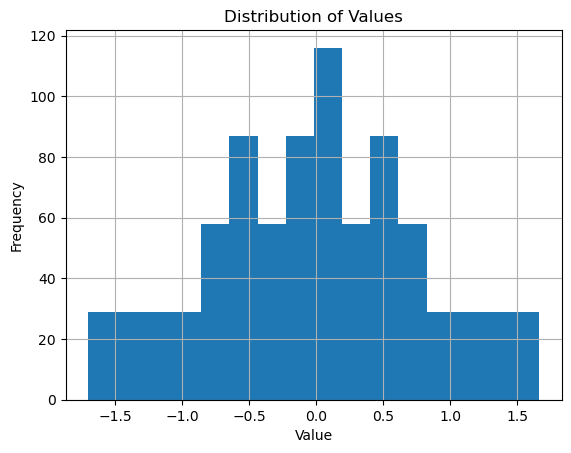

In [133]:
import matplotlib.pyplot as plt
macro['rGDP_pct'].hist(bins='auto')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# ETF

In [1]:
def create_etf():
    etf_tickers = pl.scan_csv(get_load_data_large_dir() / 'tickers_etf.csv').collect(
        streaming=True).to_series().to_list()
    start_date = "1999-01-01"
    end_date = "2023-03-20"
    etf_data = yf.download(etf_tickers, start=start_date, end=end_date)
    etf_data = etf_data.stack().swaplevel().sort_index()
    etf_data.index.names = ['ticker', 'date']
    etf_data = etf_data.astype(float)

    # Calculate returns of each ticker and rename each return column to ticker
    ret = etf_data.groupby('ticker')['Close'].apply(lambda x: x.pct_change())
    ret_df = ret.unstack(level='ticker')
    dates = etf_data.reset_index('ticker').drop(
        ['ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
    dates = dates.loc[~dates.index.duplicated(keep='first')].sort_index()
    etf_data = pd.concat([dates, ret_df], axis=1)
    etf_data.to_parquet(get_load_data_parquet_dir() / 'data_etf.parquet.brotli', compression='brotli')

In [319]:
etf = pd.read_parquet(get_load_data_parquet_dir() / 'data_etf.parquet.brotli')

# PCA Return

In [53]:
def create_pca_return():
    # Read in price data and set time frame and remove data with less than 2 years length of data (same data as create_factor.py)
    price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')
    price_data = set_timeframe(price_data, '2002-01-01', '2023-01-01')
    price_data = set_length(price_data, year=2)

    # Create returns and convert ticker index to columns
    price_data = create_return(price_data, windows=[1])
    ret = price_data[[f'RET_01']]
    ret = ret['RET_01'].unstack('ticker')
    ret.iloc[0] = ret.iloc[0].fillna(0)

    # Execute Rolling PCA
    window_size=60
    num_components=5
    pca_return = rolling_pca(data=ret, window_size=window_size, num_components=num_components, name='Return')
    pca_return.to_parquet(get_load_data_parquet_dir() / 'data_pca_ret.parquet.brotli', compression='brotli')

In [96]:
def create_etf():
    etf_tickers = pl.scan_csv(get_load_data_large_dir() / 'tickers_etf.csv').collect(
        streaming=True).to_series().to_list()
    start_date = "1999-01-01"
    end_date = "2023-03-20"
    etf_data = yf.download(etf_tickers, start=start_date, end=end_date)
    etf_data = etf_data.stack().swaplevel().sort_index()
    etf_data.index.names = ['ticker', 'date']
    etf_data = etf_data.astype(float)

    # Calculate returns of each ticker and rename each return column to ticker
    ret = etf_data.groupby('ticker')['Close'].apply(lambda x: x.pct_change())
    ret_df = ret.unstack(level='ticker')
    dates = etf_data.reset_index('ticker').drop(
        ['ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)
    dates = dates.loc[~dates.index.duplicated(keep='first')].sort_index()
    etf_data = pd.concat([dates, ret_df], axis=1)
    etf_data.to_parquet(get_load_data_parquet_dir() / 'data_etf_test.parquet.brotli', compression='brotli')

In [97]:
create_etf()

[*********************100%***********************]  10 of 10 completed


In [54]:
create_pca_return()

In [55]:
pca_ret = pd.read_parquet(get_load_data_parquet_dir() / 'data_pca_ret.parquet.brotli')

# All RF

In [56]:
def create_all_rf():
    etf_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_etf.parquet.brotli')
    fama_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_fama.parquet.brotli')
    pca_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_pca_ret.parquet.brotli')
    macro_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_macro.parquet.brotli')
    all_rf = pd.concat([etf_data, fama_data, pca_data, macro_data], axis=1)
    all_rf = set_timeframe(all_rf, '2002-01-01', '2023-01-01')
    fama_data = set_timeframe(fama_data, '2002-01-01', '2023-01-01')
    # Execute Rolling PCA
    window_size=60
    num_components=5
    pca_rf = rolling_pca(data=all_rf, window_size=window_size, num_components=num_components, name='RF')
    # Add risk-free rate
    pca_rf = pd.concat([pca_rf, fama_data['RF']], axis=1)    
    pca_rf.to_parquet(get_load_data_parquet_dir() / 'data_all_rf.parquet.brotli', compression = 'brotli')

In [57]:
create_all_rf()

In [58]:
all_rf = pd.read_parquet(get_load_data_parquet_dir() / 'data_all_rf.parquet.brotli')

# SPY Return

In [30]:
def create_spy_return():
    spy_return = get_spy('2006-01-01', '2023-01-01')
    spy_return.index.name = 'date'
    spy_return.to_parquet(get_load_data_parquet_dir() / 'data_spy.parquet.brotli', compression = 'brotli')

In [32]:
create_spy_return()

[*********************100%***********************]  1 of 1 completed


In [33]:
spy_return = pd.read_parquet(get_load_data_parquet_dir() / 'data_spy.parquet.brotli')

# Open Asset Pricing

In [4]:
def create_open_asset_pricing():
    oap_data = pd.read_parquet(get_load_data_large_dir() / 'signed_predictors_dl_wide.parquet.brotli')
    permno_codes = pd.read_csv(get_load_data_large_dir() / 'permno.csv')
    factors_to_use = ['DivSeason', 'ChTax', 'EarningsStreak', 'ResidualMomentum', 'AssetGrowth',
                  'NOA', 'SmileSlope', 'MomSeasonShort', 'InvestPPEInv', 'NetDebtFinance', 'InvGrowth', 'MomSeason11YrPlus']

    oap_data = oap_data[['permno', 'yyyymm'] + factors_to_use]
    permno_codes = permno_codes[['LPERMNO', 'tic']].rename(columns={'LPERMNO':'permno'})

    permno_unique = permno_codes.drop_duplicates().sort_values(by='permno')

    permno_unique = dict(zip(permno_unique['permno'], permno_unique['tic']))

    oap_filtered = oap_data[oap_data['permno'].isin(permno_unique.keys())]
    oap_filtered['tic'] = oap_filtered['permno'].map(permno_unique)

    oap_filtered['date'] = pd.to_datetime(oap_filtered['yyyymm'], format='%Y%m')
    oap_filtered.rename(columns={'tic':'ticker'}, inplace=True)
    oap_filtered.drop(['permno', 'yyyymm'], axis=1, inplace=True)
    oap_filtered.set_index(['ticker', 'date'], inplace=True)
    oap_filtered.sort_index(level=['ticker', 'date'], inplace=True)
    
    # Find overlapping tickers
    current_tickers = read_ticker(get_load_data_large_dir() / 'tickers_to_train_fundamental.csv')
    oap_tickers = get_ticker_idx(oap_filtered)
    overlapping_tickers = list(set(oap_tickers) & set(current_tickers))

    # Filter DataFrame based on overlapping tickers
    oap_filtered = oap_filtered[oap_filtered.index.get_level_values('ticker').isin(overlapping_tickers)]
    
    export_ticker(oap_filtered, get_load_data_large_dir() / 'tickers_to_train_open.csv')
    oap_filtered.to_parquet(get_load_data_parquet_dir() / 'data_open_asset.parquet.brotli', compression='brotli')

In [5]:
create_open_asset_pricing()

In [11]:
open_asset = pd.read_parquet(get_load_data_parquet_dir() / 'data_open_asset.parquet.brotli')

# Dividend

In [334]:
def create_dividend():
    dividend = pd.read_csv(get_load_data_large_dir() / 'dividend.csv')
    dividend = dividend.drop(['PERMNO'], axis=1)
    dividend.columns = ['date', 'ticker', 'divdecdt', 'divpaydt', 'divrecdt', 'distcode', 'divpay']
    dividend['date'] = pd.to_datetime(dividend['date'])
    dividend['divdecdt'] = pd.to_datetime(dividend['divdecdt'])
    dividend['divpaydt'] = pd.to_datetime(dividend['divpaydt'])
    dividend['divrecdt'] = pd.to_datetime(dividend['divrecdt'])
    dividend = dividend.set_index(['ticker', 'date']).sort_index(level=['ticker', 'date'])
    dividend = dividend[dividend.index.get_level_values('ticker').notna()]

    mask = ~dividend['distcode'].astype(str).str.startswith('12')
    dividend[mask] = np.nan
    dividend.to_parquet(get_load_data_parquet_dir() / 'data_dividend.parquet.brotli', compression='brotli')

In [335]:
create_dividend()

In [336]:
dividend = pd.read_parquet(get_load_data_parquet_dir() / 'data_dividend.parquet.brotli')

# Test

In [59]:
def create_pca_return_test():
    # Read in price data and set time frame and remove data with less than 2 years length of data (same data as create_factor.py)
    price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')
    ticker = read_ticker(get_load_data_large_dir() / 'tickers_to_train_fundamental.csv')
    price_data = set_timeframe(price_data, '2002-01-01', '2023-01-01')
    price_data = price_data.loc[ticker]

    # Create returns and convert ticker index to columns
    price_data = create_return(price_data, windows=[1])
    ret = price_data[[f'RET_01']]
    ret = ret['RET_01'].unstack('ticker')
    ret.iloc[0] = ret.iloc[0].fillna(0)

    # Execute Rolling PCA
    window_size=60
    num_components=5
    pca_return = rolling_pca(data=ret, window_size=window_size, num_components=num_components, name='Return')
    pca_return.to_parquet(get_load_data_parquet_dir() / 'data_pca_ret_test.parquet.brotli', compression='brotli')

def create_all_rf_test():
    etf_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_etf.parquet.brotli')
    fama_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_fama.parquet.brotli')
    pca_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_pca_ret_test.parquet.brotli')
    macro_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_macro.parquet.brotli')
    all_rf = pd.concat([etf_data, fama_data, pca_data, macro_data], axis=1)
    all_rf = set_timeframe(all_rf, '2002-01-01', '2023-01-01')
    fama_data = set_timeframe(fama_data, '2002-01-01', '2023-01-01')
    # Execute Rolling PCA
    window_size=60
    num_components=5
    pca_rf = rolling_pca(data=all_rf, window_size=window_size, num_components=num_components, name='RF')
    # Add risk-free rate
    pca_rf = pd.concat([pca_rf, fama_data['RF']], axis=1)    
    pca_rf.to_parquet(get_load_data_parquet_dir() / 'data_all_rf_test.parquet.brotli', compression = 'brotli')

In [ ]:
create_pca_return_test()

In [ ]:
create_all_rf_test()

# Outstanding

In [134]:
def create_outstanding():
    out = pd.read_csv(get_load_data_large_dir() / 'outstanding.csv')
    out = out.drop(['GVKEY', 'LINKPRIM', 'LIID', 'LINKTYPE', 'LPERMNO', 'LPERMCO', 'LINKDT',
                    'LINKENDDT', 'iid', 'ccmbegdt'], axis=1)
    out['datadate'] = pd.to_datetime(out['datadate'])
    out = out.rename(columns={'datadate':'date', 'tic':'ticker', 'cshoc':'out'})
    out = out.set_index(['ticker', 'date'])
    out = out.sort_index(level=['ticker', 'date'])
    tickers = read_ticker(get_load_data_large_dir() / 'tickers_to_train_fundamental.csv')
    tickers.remove('ABC')
    out = out.loc[tickers]
    out.to_parquet(get_load_data_parquet_dir() / 'data_out.parquet.brotli')

In [135]:
create_outstanding()

In [136]:
out = pd.read_parquet(get_load_data_parquet_dir() / 'data_out.parquet.brotli')

# Fund Ind

In [109]:
def create_fund_ind():
    fund_ind = pd.read_csv(get_load_data_large_dir() / 'fund_ind.csv')

    def convert_to_float(cell):
        if isinstance(cell, str) and '%' in cell:
            return float(cell.replace('%', '')) / 100
        return float(cell)

    def connect(s):
        return '_'.join(word for word in s.split() if word)

    fund_ind['public_date'] = pd.to_datetime(fund_ind['public_date'])
    fund_ind = fund_ind.rename(columns={'public_date': 'date'}).set_index(['date', 'gicdesc'])
    fund_ind = fund_ind.drop(['NFIRM'], axis=1)
    fund_ind = fund_ind.fillna(0)

    collect = []
    for ind, df in fund_ind.groupby('gicdesc'):
        ind = connect(ind)
        df = df.applymap(convert_to_float)
        # Execute Rolling PCA
        window_size=5 # 3 months
        num_components=5
        pca_fund_ind = rolling_pca(data=df, window_size=window_size, num_components=num_components, name=f'FI_{ind}')
        pca_fund_ind = pca_fund_ind.reset_index('gicdesc').drop('gicdesc', axis=1)
        collect.append(pca_fund_ind)

    fund_ind = pd.concat(collect, axis=1)
    fund_ind.to_parquet(get_load_data_parquet_dir() / 'data_fund_ind.parquet.brotli')

In [110]:
create_fund_ind()

In [111]:
fund_ind = pd.read_parquet(get_load_data_parquet_dir() / 'data_fund_ind.parquet.brotli')

# Fund Raw

In [144]:
def create_fund_raw():
    fund_raw = pd.read_csv(get_load_data_large_dir() / 'fund_raw.csv')
    attributes = ['gvkey', 'fyearq', 'fyr', 'indfmt', 'costat', 'consol', 'popsrc', 'datafmt', 'curcdq', 'datacqtr', 'datafqtr', 'acchgq']
    fund_raw = fund_raw.drop(attributes, axis=1)
    fund_raw['datadate'] = pd.to_datetime(fund_raw['datadate'])
    fund_raw = fund_raw.rename(columns={'datadate': 'date', 'tic': 'ticker'}).set_index(['ticker', 'date'])
    fund_raw = fund_raw.sort_index(level=['ticker', 'date'])
    fund_raw = fund_raw.drop(columns=fund_raw.columns[fund_raw.isna().sum() > len(fund_raw) / 3])
    
    # Retrieve quarter category
    fund_q = fund_raw[['fqtr']]
    fund_q = fund_q.fillna(-1)
    fund_q = fund_q.astype(int)
    fund_raw = fund_raw.drop('fqtr', axis=1)
    fund_raw = fund_raw.astype(float)
#     fund_raw = fund_raw.groupby('ticker').pct_change()
    fund_raw = fund_raw.mul(10**6)

    # Change to daily interval
    date_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_date.parquet.brotli')
    tickers = read_ticker(get_load_data_large_dir() / 'tickers_to_train_fundamental.csv')
    date_data = set_timeframe(date_data, '2004-01-01', '2023-06-01')
    
    fund_raw = pd.merge(date_data.loc[tickers], fund_raw, left_index=True, right_index=True, how='left')
    fund_raw = fund_raw.loc[~fund_raw.index.duplicated(keep='first')]
    fund_raw = fund_raw.ffill()
    
    fund_q = pd.merge(date_data.loc[tickers], fund_q, left_index=True, right_index=True, how='left')
    fund_q = fund_q.loc[~fund_q.index.duplicated(keep='first')]
    fund_q = fund_q.ffill()
    fund_raw = fund_raw.replace([np.inf, -np.inf], np.nan)
    
    # Divide by outstanding shares
    out_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_out.parquet.brotli')
    fund_raw = pd.merge(fund_raw, out_data.out, left_index=True, right_index=True, how='left')
    fund_raw = fund_raw.loc[~fund_raw.index.duplicated(keep='first')]
    fund_raw.iloc[:, :-1] = fund_raw.iloc[:, :-1].div(fund_raw.out, axis=0)
    fund_raw = fund_raw.drop(['out'], axis=1)
    fund_raw = fund_raw.replace([np.inf, -np.inf], np.nan)

#     # Divide by price
#     price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')
#     fund_raw = pd.merge(fund_raw, price_data.Close.loc[tickers], left_index=True, right_index=True, how='left')
#     fund_raw = fund_raw.loc[~fund_raw.index.duplicated(keep='first')]
#     fund_raw.iloc[:, :-1] = fund_raw.iloc[:, :-1].div(fund_raw.Close, axis=0)
#     fund_raw = fund_raw.drop(['Close'], axis=1)
#     fund_raw = fund_raw.replace([np.inf, -np.inf], np.nan)
    
    fund_q.to_parquet(get_load_data_parquet_dir() / 'data_fund_q.parquet.brotli')
    fund_raw.to_parquet(get_load_data_parquet_dir() / 'data_fund_raw.parquet.brotli')

In [145]:
create_fund_raw()

In [146]:
fund_q = pd.read_parquet(get_load_data_parquet_dir() / 'data_fund_q.parquet.brotli')

In [159]:
fund_raw = pd.read_parquet(get_load_data_parquet_dir() / 'data_fund_raw.parquet.brotli')

# Fund Ratio

In [221]:
def create_fund_ratio():
    fund_ratio = pd.read_csv(get_load_data_large_dir() / 'fund_ratio.csv')
    fund_ratio['public_date'] = pd.to_datetime(fund_ratio['public_date'])
    fund_ratio = fund_ratio.drop(['permno', 'adate', 'qdate'], axis=1)
    fund_ratio = fund_ratio.rename(columns={'public_date': 'date', 'TICKER': 'ticker'}).set_index(['ticker', 'date'])
    fund_ratio = fund_ratio.sort_index(level=['ticker', 'date'])
    fund_ratio = fund_ratio[fund_ratio.index.get_level_values('ticker').notna()]
    fund_ratio = fund_ratio.drop(columns=fund_ratio.columns[fund_ratio.isna().sum() > len(fund_ratio) / 3])
    fund_ratio = fund_ratio.astype(float)

#     # Multiply monthly data by monthly price
#     price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')
#     complete_date_range = pd.date_range(start=fund_ratio.index.get_level_values('date').min(), end=fund_ratio.index.get_level_values('date').max(), freq='D')
#     multi_idx = pd.MultiIndex.from_product([tickers, complete_date_range], names=['ticker', 'date'])
#     price_data = price_data.Close.reindex(multi_idx).ffill()
#     fund_ratio = pd.merge(fund_ratio, price_data, left_index=True, right_index=True, how='left')
#     fund_ratio = fund_ratio.loc[~fund_ratio.index.duplicated(keep='first')]

#     fund_ratio.iloc[:, :-1] = fund_ratio.iloc[:, :-1].mul(fund_ratio.Close, axis=0)
#     fund_ratio = fund_ratio.drop(['Close'], axis=1)
#     fund_ratio = fund_ratio.replace([np.inf, -np.inf], np.nan)
    
#     # Change to daily interval
#     date_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_date.parquet.brotli')
#     tickers = read_ticker(get_load_data_large_dir() / 'tickers_to_train_fundamental.csv')
#     date_data = set_timeframe(date_data, '2002-01-01', '2023-06-01')

#     fund_ratio = pd.merge(date_data.loc[tickers], fund_ratio, left_index=True, right_index=True, how='left')
#     fund_ratio = fund_ratio.loc[~fund_ratio.index.duplicated(keep='first')]
#     fund_ratio = fund_ratio.ffill()
    
        
#     # Divide by price
#     price_data = pd.read_parquet(get_load_data_parquet_dir() / 'data_price.parquet.brotli')
#     fund_ratio = pd.merge(fund_ratio, price_data.Close.loc[tickers], left_index=True, right_index=True, how='left')
#     fund_ratio = fund_ratio.loc[~fund_ratio.index.duplicated(keep='first')]
#     fund_ratio.iloc[:, :-1] = fund_ratio.iloc[:, :-1].div(fund_ratio.Close, axis=0)
#     fund_ratio = fund_ratio.drop(['Close'], axis=1)
#     fund_ratio = fund_ratio.replace([np.inf, -np.inf], np.nan)

    # Ranking by each column
    ratio_rank = fund_ratio[['CAPEI']]
    for col in fund_ratio.columns:
        ratio_rank[f'{col}_rank'] = fund_ratio.groupby('date')[col].rank(pct=True)

    ratio_rank = ratio_rank.drop(['CAPEI'], axis=1)
    
    fund_ratio.to_parquet(get_load_data_parquet_dir() / 'data_fund_ratio.parquet.brotli', compression='brotli')
    ratio_rank.to_parquet(get_load_data_parquet_dir() / 'data_fund_ratio_rank.parquet.brotli', compression='brotli')

In [222]:
create_fund_ratio()

In [258]:
fund_ratio = pd.read_parquet(get_load_data_parquet_dir() / 'data_fund_ratio.parquet.brotli')

In [224]:
fund_ratio_rank = pd.read_parquet(get_load_data_parquet_dir() / 'data_fund_ratio_rank.parquet.brotli')